# Declaration of Originality

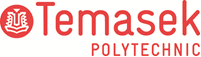

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Goh Seng Kang (2400312A)
* Tutorial Group                : PC04
* Tutor						    : Mr Emile SABASTIAN
* Submission Date               : 


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [60]:
## Import libraries
import pandas as pd
import numpy as np

# 1. Business Understanding
Goal: ?

# 2. Data Understanding

## 2.1 Load dataset

In [61]:
## Read *.csv file into pandas DataFrame
df = pd.read_csv('computer_prices_all.csv')
df

,device_type,brand,model,release_year,os,form_factor,cpu_brand,cpu_model,cpu_tier,cpu_cores,...,resolution,refresh_hz,battery_wh,charger_watts,psu_watts,wifi,bluetooth,weight_kg,warranty_months,price
0,Desktop,Samsung,Samsung Forge XDI,2022,Windows,ATX,Intel,Intel i5-11129,3,12,...,2560x1440,90,0,0,750,Wi-Fi 6,5.1,11.00,36,1383.99
1,Laptop,Samsung,Samsung Pro KM8,2022,Windows,Mainstream,Intel,Intel i7-11114,4,12,...,1920x1080,90,56,120,0,Wi-Fi 6,5.3,2.03,12,2274.99
2,Desktop,Lenovo,Lenovo Strix BIE,2024,macOS,SFF,AMD,AMD Ryzen 5 5168,2,8,...,3440x1440,120,0,0,850,Wi-Fi 6,5.0,7.00,24,1879.99
3,Desktop,Dell,Dell Cube AXR,2024,Windows,ATX,AMD,AMD Ryzen 5 7550,2,6,...,3440x1440,120,0,0,650,Wi-Fi 6,5.2,6.00,36,1331.99
4,Laptop,Gigabyte,Gigabyte Pro IX1,2024,Linux,Gaming,AMD,AMD Ryzen 7 6230,5,16,...,2560x1600,90,80,90,0,Wi-Fi 6,5.2,1.50,12,2681.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Laptop,ASUS,ASUS Pro ZWL,2023,Windows,Mainstream,Intel,Intel i7-13721,4,12,...,1920x1080,144,90,180,0,Wi-Fi 6,5.1,1.87,24,1712.99
99996,Laptop,Lenovo,Lenovo Stealth 014,2018,Windows,Ultrabook,AMD,AMD Ryzen 5 5117,2,8,...,2560x1600,90,50,65,0,Wi-Fi 6,5.1,1.37,12,1258.99
99997,Laptop,ASUS,ASUS Zen LKD,2020,Windows,Mainstream,Intel,Intel i5-12677,2,6,...,2560x1600,120,99,180,0,Wi-Fi 6,4.2,1.17,12,1686.99
99998,Laptop,ASUS,ASUS Blade DH6,2020,Windows,Mainstream,AMD,AMD Ryzen 7 4590,4,12,...,2560x1600,120,60,90,0,Wi-Fi 6,5.3,1.70,24,2164.99


In [62]:
## Remove Laptop rows as we are only interested in Desktop prices, specifically gaming desktops
df = df[df['device_type'] != 'Laptop']
df

,device_type,brand,model,release_year,os,form_factor,cpu_brand,cpu_model,cpu_tier,cpu_cores,...,resolution,refresh_hz,battery_wh,charger_watts,psu_watts,wifi,bluetooth,weight_kg,warranty_months,price
0,Desktop,Samsung,Samsung Forge XDI,2022,Windows,ATX,Intel,Intel i5-11129,3,12,...,2560x1440,90,0,0,750,Wi-Fi 6,5.1,11.0,36,1383.99
2,Desktop,Lenovo,Lenovo Strix BIE,2024,macOS,SFF,AMD,AMD Ryzen 5 5168,2,8,...,3440x1440,120,0,0,850,Wi-Fi 6,5.0,7.0,24,1879.99
3,Desktop,Dell,Dell Cube AXR,2024,Windows,ATX,AMD,AMD Ryzen 5 7550,2,6,...,3440x1440,120,0,0,650,Wi-Fi 6,5.2,6.0,36,1331.99
5,Desktop,MSI,MSI Think KSG,2025,Windows,ATX,Intel,Intel i7-10369,5,16,...,2560x1440,90,0,0,1000,Wi-Fi 5,5.0,9.0,36,2751.99
6,Desktop,Apple,Apple Arena R5Q,2024,Windows,ATX,Apple,Apple M2,2,6,...,2560x1440,60,0,0,850,Wi-Fi 6,5.1,9.0,24,1609.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99989,Desktop,Apple,Apple Think KPV,2020,Windows,Full-Tower,Apple,Apple M3,4,12,...,3440x1440,60,0,0,1200,Wi-Fi 6,5.2,7.0,24,2121.99
99991,Desktop,Lenovo,Lenovo Station A87,2024,Windows,Micro-ATX,AMD,AMD Ryzen 5 4642,3,12,...,2560x1440,60,0,0,750,Wi-Fi 6,5.0,7.0,12,1595.99
99992,Desktop,MSI,MSI Creator 8TU,2018,macOS,SFF,Intel,Intel i5-13152,3,8,...,3840x2160,240,0,0,650,Wi-Fi 6E,5.0,4.0,24,2309.99
99994,Desktop,Lenovo,Lenovo Creator 2G4,2023,Linux,Mini-ITX,Intel,Intel i5-10539,3,12,...,3440x1440,120,0,0,850,Wi-Fi 5,4.2,7.0,24,1953.99


## 2.2 Summary Statistics

In [63]:
## Understand the type of variable for each column
df.dtypes

device_type             object
brand                   object
model                   object
release_year             int64
os                      object
form_factor             object
cpu_brand               object
cpu_model               object
cpu_tier                 int64
cpu_cores                int64
cpu_threads              int64
cpu_base_ghz           float64
cpu_boost_ghz          float64
gpu_brand               object
gpu_model               object
gpu_tier                 int64
vram_gb                  int64
ram_gb                   int64
storage_type            object
storage_gb               int64
storage_drive_count      int64
display_type            object
display_size_in        float64
resolution              object
refresh_hz               int64
battery_wh               int64
charger_watts            int64
psu_watts                int64
wifi                    object
bluetooth              float64
weight_kg              float64
warranty_months          int64
price   

In [64]:
## Check for missing data
df.isnull().sum()

device_type            0
brand                  0
model                  0
release_year           0
os                     0
form_factor            0
cpu_brand              0
cpu_model              0
cpu_tier               0
cpu_cores              0
cpu_threads            0
cpu_base_ghz           0
cpu_boost_ghz          0
gpu_brand              0
gpu_model              0
gpu_tier               0
vram_gb                0
ram_gb                 0
storage_type           0
storage_gb             0
storage_drive_count    0
display_type           0
display_size_in        0
resolution             0
refresh_hz             0
battery_wh             0
charger_watts          0
psu_watts              0
wifi                   0
bluetooth              0
weight_kg              0
warranty_months        0
price                  0
dtype: int64

In [65]:
## Describe data distribution
## describe first 16 columns 
df.iloc[:, 0:16].describe(include='all')

,device_type,brand,model,release_year,os,form_factor,cpu_brand,cpu_model,cpu_tier,cpu_cores,cpu_threads,cpu_base_ghz,cpu_boost_ghz,gpu_brand,gpu_model,gpu_tier
count,40156,40156,40156,40156.000000,40156,40156,40156,40156,40156.000000,40156.000000,40156.000000,40156.000000,40156.000000,40156,40156,40156.000000
unique,1,10,39879,NaN,4,5,3,19160,NaN,NaN,NaN,NaN,NaN,4,49,NaN
top,Desktop,Lenovo,Samsung Station VI0,NaN,Windows,ATX,Intel,Apple M1,NaN,NaN,NaN,NaN,NaN,NVIDIA,Apple Integrated,NaN
freq,40156,6485,2,NaN,28882,15597,21131,572,NaN,NaN,NaN,NaN,NaN,21967,7529,NaN
mean,NaN,NaN,NaN,2022.316491,NaN,NaN,NaN,NaN,3.142818,10.724475,19.757346,2.828564,3.768578,NaN,NaN,3.163462
std,NaN,NaN,NaN,2.021924,NaN,NaN,NaN,NaN,1.373042,5.102002,9.818682,0.274608,0.290068,NaN,NaN,1.456368
min,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN,1.000000,4.000000,4.000000,2.400000,3.200000,NaN,NaN,1.000000
25%,NaN,NaN,NaN,2021.000000,NaN,NaN,NaN,NaN,2.000000,8.000000,12.000000,2.600000,3.600000,NaN,NaN,2.000000
50%,NaN,NaN,NaN,2023.000000,NaN,NaN,NaN,NaN,3.000000,10.000000,16.000000,2.800000,3.800000,NaN,NaN,3.000000
75%,NaN,NaN,NaN,2024.000000,NaN,NaN,NaN,NaN,4.000000,14.000000,24.000000,3.000000,4.000000,NaN,NaN,4.000000


In [66]:
## describe last 17 columns
df.iloc[:, 16:].describe(include='all')

,vram_gb,ram_gb,storage_type,storage_gb,storage_drive_count,display_type,display_size_in,resolution,refresh_hz,battery_wh,charger_watts,psu_watts,wifi,bluetooth,weight_kg,warranty_months,price
count,40156.000000,40156.000000,40156,40156.000000,40156.000000,40156,40156.000000,40156,40156.000000,40156.0,40156.0,40156.000000,40156,40156.000000,40156.000000,40156.000000,40156.000000
unique,NaN,NaN,4,NaN,NaN,6,NaN,4,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN
top,NaN,NaN,NVMe,NaN,NaN,LED,NaN,1920x1080,NaN,NaN,NaN,NaN,Wi-Fi 6,NaN,NaN,NaN,NaN
freq,NaN,NaN,18083,NaN,NaN,12943,NaN,15104,NaN,NaN,NaN,NaN,18640,NaN,NaN,NaN,NaN
mean,6.416426,41.562705,NaN,900.092838,2.043505,NaN,27.823588,NaN,98.524330,0.0,0.0,678.654497,NaN,5.085315,8.280929,22.140950,1819.545284
std,4.101515,32.820845,NaN,772.362905,0.957378,NaN,3.355856,NaN,43.319296,0.0,0.0,194.055038,NaN,0.245282,3.056802,10.231462,532.550729
min,0.000000,8.000000,NaN,256.000000,1.000000,NaN,24.000000,NaN,60.000000,0.0,0.0,300.000000,NaN,4.200000,4.000000,12.000000,388.990000
25%,4.000000,16.000000,NaN,512.000000,1.000000,NaN,24.000000,NaN,60.000000,0.0,0.0,550.000000,NaN,5.000000,6.000000,12.000000,1433.990000
50%,6.000000,32.000000,NaN,512.000000,2.000000,NaN,27.000000,NaN,90.000000,0.0,0.0,650.000000,NaN,5.100000,8.000000,24.000000,1767.990000
75%,10.000000,64.000000,NaN,1024.000000,3.000000,NaN,32.000000,NaN,120.000000,0.0,0.0,750.000000,NaN,5.200000,10.000000,24.000000,2152.990000


In [67]:
## Drop unnecessary columns
df = df.drop(columns=[
    'model',           # not needed as we are only predicting price range
    'device_type',     # not needed as only 1 unique value 'Desktop' exists after filtering
    'release_year',    # not needed as we want to only predict based on hardware specs
    'form_factor',     # not needed as we want to only predict based on hardware specs
    'battery_wh',      # not needed as only 1 unique value 0 exists after filtering
    'charger_watts',   # not needed as only 1 unique value 0 exists after filtering
    'weight_kg',       # not needed as we want to only predict based on hardware specs
    'brand'            # not needed as we want to only predict based on hardware specs
])

df


,os,cpu_brand,cpu_model,cpu_tier,cpu_cores,cpu_threads,cpu_base_ghz,cpu_boost_ghz,gpu_brand,gpu_model,...,storage_drive_count,display_type,display_size_in,resolution,refresh_hz,psu_watts,wifi,bluetooth,warranty_months,price
0,Windows,Intel,Intel i5-11129,3,12,24,2.8,3.8,NVIDIA,RTX 40 60,...,1,LED,27.0,2560x1440,90,750,Wi-Fi 6,5.1,36,1383.99
2,macOS,AMD,AMD Ryzen 5 5168,2,8,16,2.6,3.6,NVIDIA,RTX 40 50,...,2,LED,32.0,3440x1440,120,850,Wi-Fi 6,5.0,24,1879.99
3,Windows,AMD,AMD Ryzen 5 7550,2,6,12,2.6,3.6,AMD,RX 7000 60,...,2,IPS,27.0,3440x1440,120,650,Wi-Fi 6,5.2,36,1331.99
5,Windows,Intel,Intel i7-10369,5,16,32,3.2,4.3,NVIDIA,RTX 40 90,...,2,LED,24.0,2560x1440,90,1000,Wi-Fi 5,5.0,36,2751.99
6,Windows,Apple,Apple M2,2,6,6,2.6,3.5,Apple,Apple Integrated,...,2,VA,32.0,2560x1440,60,850,Wi-Fi 6,5.1,24,1609.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99989,Windows,Apple,Apple M3,4,12,12,3.0,4.0,Apple,Apple Integrated,...,2,Mini-LED,27.0,3440x1440,60,1200,Wi-Fi 6,5.2,24,2121.99
99991,Windows,AMD,AMD Ryzen 5 4642,3,12,24,2.8,3.6,NVIDIA,RTX 30 70,...,2,OLED,27.0,2560x1440,60,750,Wi-Fi 6,5.0,12,1595.99
99992,macOS,Intel,Intel i5-13152,3,8,16,2.8,3.8,NVIDIA,RTX 40 70,...,2,LED,27.0,3840x2160,240,650,Wi-Fi 6E,5.0,24,2309.99
99994,Linux,Intel,Intel i5-10539,3,12,24,2.8,3.8,NVIDIA,RTX 30 60,...,3,OLED,24.0,3440x1440,120,850,Wi-Fi 5,4.2,24,1953.99


In [68]:
##Drop uneeded rows
##Drop rows where GPU brand != NVIDIA or AMD as we are only interested in gaming desktops, which
# are likely to have discrete GPUs from these 2 brands
df = df[df['gpu_brand'].isin(['NVIDIA', 'AMD'])]

##Drop rows where CPU brand != Intel or AMD as these are the main CPU brands for gaming desktops
df = df[df['cpu_brand'].isin(['Intel', 'AMD'])]

In [69]:
##Describe data distribution for all 26 columns fully after dropping unnecessary columns
df.describe(include='all')

,os,cpu_brand,cpu_model,cpu_tier,cpu_cores,cpu_threads,cpu_base_ghz,cpu_boost_ghz,gpu_brand,gpu_model,...,storage_drive_count,display_type,display_size_in,resolution,refresh_hz,psu_watts,wifi,bluetooth,warranty_months,price
count,28375,28375,28375,28375.000000,28375.000000,28375.000000,28375.000000,28375.000000,28375,28375,...,28375.000000,28375,28375.000000,28375,28375.000000,28375.000000,28375,28375.000000,28375.000000,28375.000000
unique,4,2,16916,NaN,NaN,NaN,NaN,NaN,2,36,...,NaN,6,NaN,4,NaN,NaN,4,NaN,NaN,NaN
top,Windows,Intel,Intel i5-12199,NaN,NaN,NaN,NaN,NaN,NVIDIA,RTX 40 70,...,NaN,LED,NaN,1920x1080,NaN,NaN,Wi-Fi 6,NaN,NaN,NaN
freq,20446,16968,8,NaN,NaN,NaN,NaN,NaN,21967,2406,...,NaN,9149,NaN,10658,NaN,NaN,13125,NaN,NaN,NaN
mean,NaN,NaN,NaN,3.071507,10.448000,20.698220,2.814301,3.755211,NaN,NaN,...,2.044581,NaN,27.809339,NaN,98.462802,678.361233,NaN,5.085085,22.181498,1771.136115
std,NaN,NaN,NaN,1.350317,4.904678,9.832944,0.270063,0.285817,NaN,NaN,...,0.959249,NaN,3.353634,NaN,43.331158,193.090432,NaN,0.245682,10.273413,494.722063
min,NaN,NaN,NaN,1.000000,4.000000,6.000000,2.400000,3.200000,NaN,NaN,...,1.000000,NaN,24.000000,NaN,60.000000,300.000000,NaN,4.200000,12.000000,388.990000
25%,NaN,NaN,NaN,2.000000,6.000000,12.000000,2.600000,3.500000,NaN,NaN,...,1.000000,NaN,24.000000,NaN,60.000000,550.000000,NaN,5.000000,12.000000,1408.990000
50%,NaN,NaN,NaN,3.000000,10.000000,18.000000,2.800000,3.700000,NaN,NaN,...,2.000000,NaN,27.000000,NaN,90.000000,650.000000,NaN,5.100000,24.000000,1726.990000
75%,NaN,NaN,NaN,4.000000,12.000000,24.000000,3.000000,4.000000,NaN,NaN,...,3.000000,NaN,32.000000,NaN,120.000000,750.000000,NaN,5.200000,24.000000,2093.990000


## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

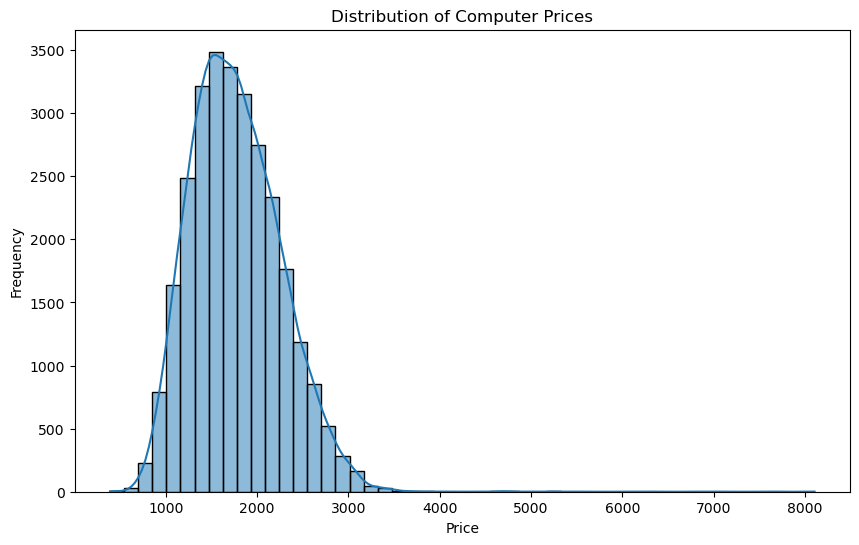

In [70]:
## Understanding distribution of target
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Computer Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


### 2.3.1.2 Understanding distribution of features

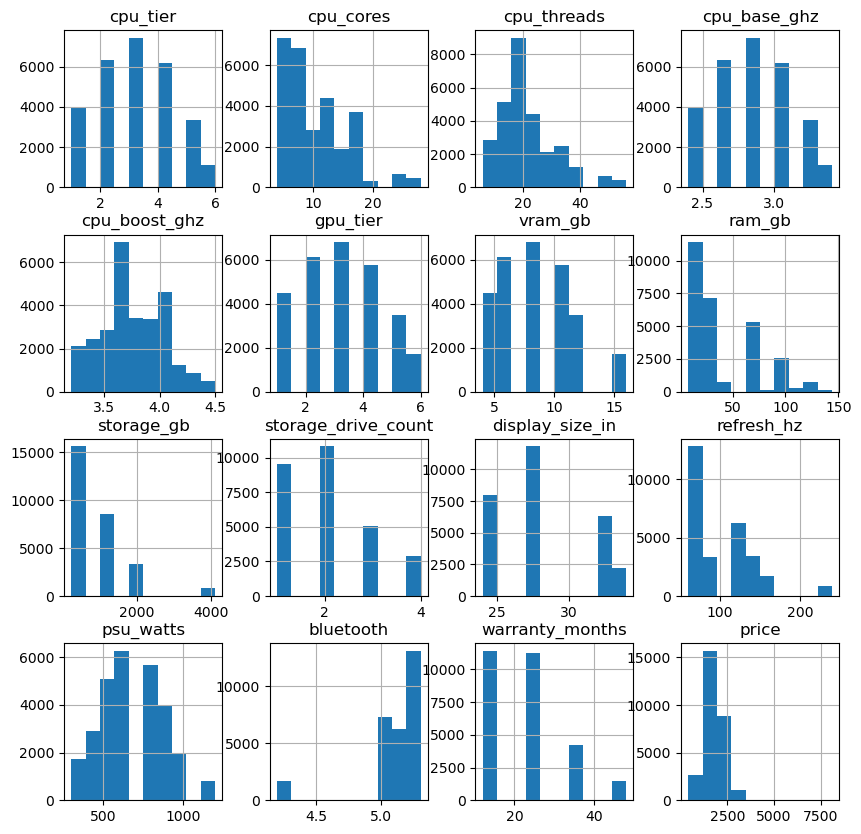

In [71]:
## Understanding distribution of features with histogram
df.hist(figsize=(10,10))
plt.show()

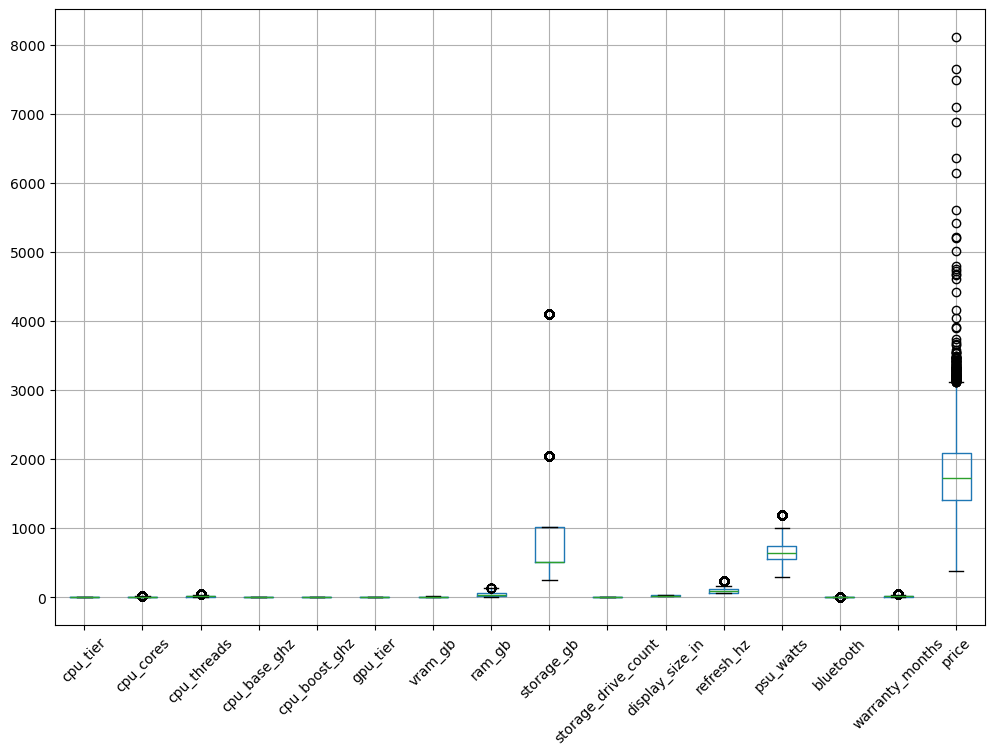

In [72]:
## Plot boxplot to identify outliers

df.boxplot(figsize=(12,8), rot=45)
plt.show()

### 2.3.2 Understanding relationship between variables

In [73]:
## Understanding relationship between variables
## Calculate correlation matrix
col_num = df.select_dtypes(include=['float','int']).columns

df_corr = df[col_num].corr()
df_corr


,cpu_tier,cpu_cores,cpu_threads,cpu_base_ghz,cpu_boost_ghz,gpu_tier,vram_gb,ram_gb,storage_gb,storage_drive_count,display_size_in,refresh_hz,psu_watts,bluetooth,warranty_months,price
cpu_tier,1.000000,0.925029,0.923498,1.000000,0.941093,0.885545,0.878413,0.912864,0.012526,-0.004148,0.001719,0.000595,0.000399,-0.005167,0.002332,0.760464
cpu_cores,0.925029,1.000000,0.998155,0.925029,0.871630,0.819581,0.831173,0.905421,0.010400,-0.004605,0.003325,-0.000841,0.000457,-0.004382,-0.001222,0.712673
cpu_threads,0.923498,0.998155,1.000000,0.923498,0.870212,0.817884,0.829350,0.903697,0.010375,-0.004929,0.002363,-0.001478,0.000522,-0.004311,-0.001447,0.711414
cpu_base_ghz,1.000000,0.925029,0.923498,1.000000,0.941093,0.885545,0.878413,0.912864,0.012526,-0.004148,0.001719,0.000595,0.000399,-0.005167,0.002332,0.760464
cpu_boost_ghz,0.941093,0.871630,0.870212,0.941093,1.000000,0.833594,0.827180,0.860259,0.011034,0.000933,0.002720,0.001163,0.002864,-0.008741,0.001873,0.715056
gpu_tier,0.885545,0.819581,0.817884,0.885545,0.833594,1.000000,0.991562,0.912159,0.010989,-0.001731,0.001305,-0.002576,0.001396,-0.005216,0.000624,0.784674
vram_gb,0.878413,0.831173,0.829350,0.878413,0.827180,0.991562,1.000000,0.921772,0.011953,-0.001875,0.001600,-0.002622,0.002278,-0.004677,0.000350,0.781766
ram_gb,0.912864,0.905421,0.903697,0.912864,0.860259,0.912159,0.921772,1.000000,0.008823,-0.005165,0.002925,-0.004625,-0.001465,-0.006101,-0.001788,0.763936
storage_gb,0.012526,0.010400,0.010375,0.012526,0.011034,0.010989,0.011953,0.008823,1.000000,0.006564,0.009777,0.003456,-0.002372,0.000047,-0.006493,0.105199
storage_drive_count,-0.004148,-0.004605,-0.004929,-0.004148,0.000933,-0.001731,-0.001875,-0.005165,0.006564,1.000000,0.003442,0.000843,0.003553,0.001027,-0.001343,-0.003688


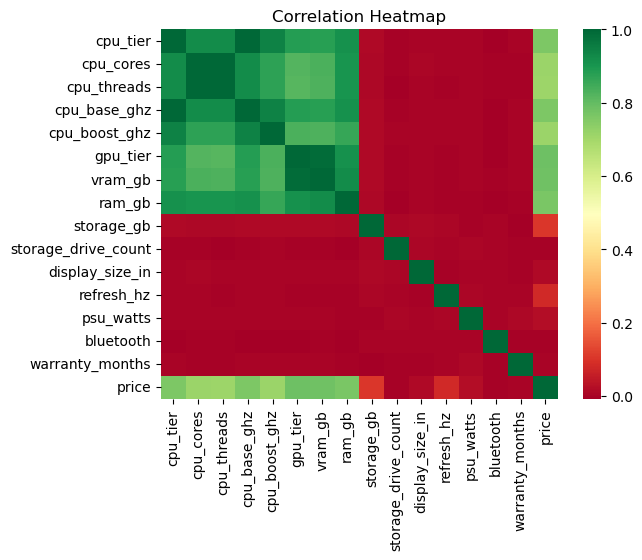

In [74]:
##Plot heatmap
sns.heatmap(df_corr, cmap='RdYlGn') ##RdYlGn: Red-yellow-green
plt.title('Correlation Heatmap')
plt.show()

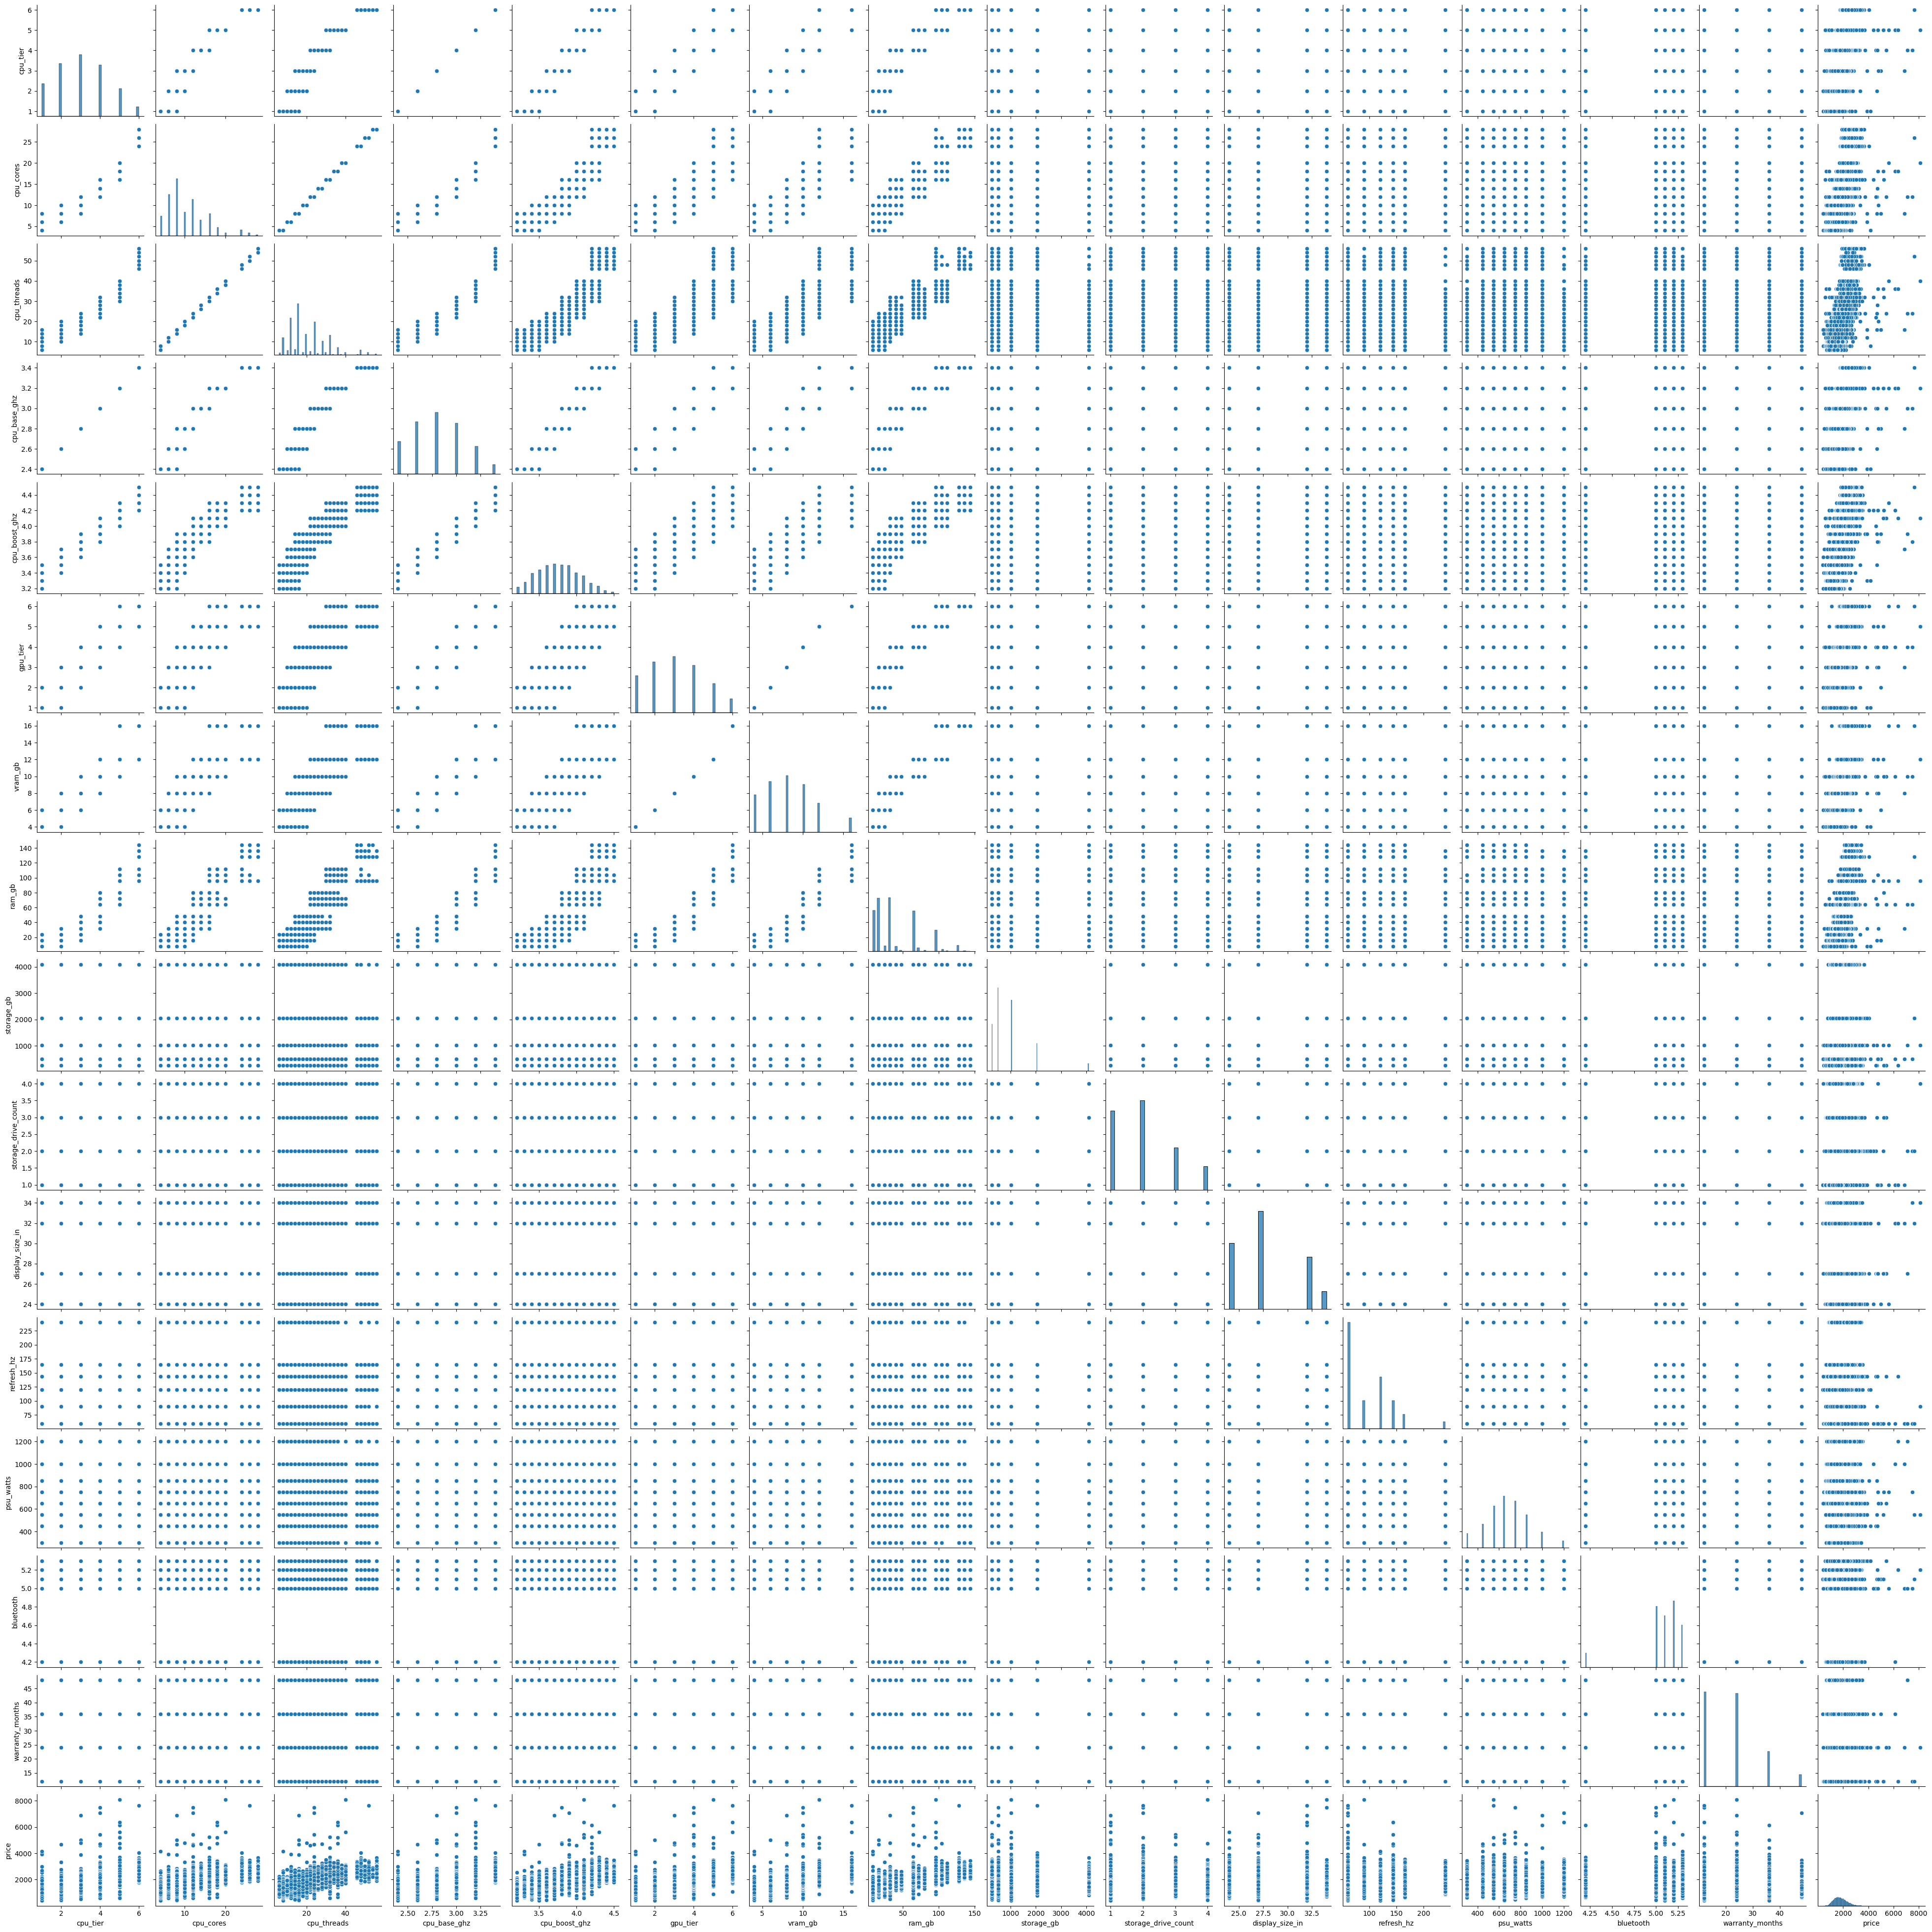

In [75]:
##Plot pairplot to understand relationships between variables
sns.pairplot(df)
plt.show()

# 3. Data Preparation

## 3.1 Data Cleaning

In [79]:
## Clean data
##Remove uneeded CPU columns
## Keep CPU tier and CPU threads
df = df.drop(columns=[
    'cpu_base_ghz',    # not needed as both are highly correlated with cpu tier, and cpu tier is a better indicator of performance
    'cpu_boost_ghz', 
    'cpu_cores',     # not needed as we have cpu_threads, which is a better indicator of performance, and corr
    'cpu_brand',     # not needed as we are only are looking at raw CPU performance via cpu tier
    'cpu_model'      # not needed as we are only are looking at raw CPU performance via cpu tier
])

## Remove uneeded GPU columns
## Keep GPU model and GPU memory size
df = df.drop(columns=[
    'gpu_brand',      # not needed as we have the gpu model, which indicates the brand as well
    'gpu_tier'        # not needed as we have gpu model, which is a better indicator of performance
])

df

,os,cpu_tier,cpu_threads,gpu_model,vram_gb,ram_gb,storage_type,storage_gb,storage_drive_count,display_type,display_size_in,resolution,refresh_hz,psu_watts,wifi,bluetooth,warranty_months,price
0,Windows,3,24,RTX 40 60,6,16,NVMe,1024,1,LED,27.0,2560x1440,90,750,Wi-Fi 6,5.1,36,1383.99
2,macOS,2,16,RTX 40 50,4,8,NVMe,512,2,LED,32.0,3440x1440,120,850,Wi-Fi 6,5.0,24,1879.99
3,Windows,2,12,RX 7000 60,6,16,HDD,512,2,IPS,27.0,3440x1440,120,650,Wi-Fi 6,5.2,36,1331.99
5,Windows,5,32,RTX 40 90,16,96,NVMe,512,2,LED,24.0,2560x1440,90,1000,Wi-Fi 5,5.0,36,2751.99
11,Windows,2,10,RTX 30 60,6,16,NVMe,1024,3,IPS,32.0,2560x1440,120,750,Wi-Fi 6E,5.2,36,1366.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99985,Linux,3,24,RTX 40 70,8,32,HDD,1024,2,IPS,32.0,1920x1080,120,650,Wi-Fi 6,5.0,48,1362.99
99986,Linux,1,16,RTX 30 50,4,8,NVMe,1024,2,IPS,24.0,1920x1080,60,450,Wi-Fi 6,5.0,12,990.99
99991,Windows,3,24,RTX 30 70,8,32,Hybrid,512,2,OLED,27.0,2560x1440,60,750,Wi-Fi 6,5.0,12,1595.99
99992,macOS,3,16,RTX 40 70,8,32,SSD,512,2,LED,27.0,3840x2160,240,650,Wi-Fi 6E,5.0,24,2309.99


## 3.2 Train-Test Split

In [80]:
## Split data into train set and test set
y = df['price'] ## Select target column

col_irrelevant = ['price'] ##List of irrelevant columns
X = df.drop(col_irrelevant, axis=1) ## Drop irrelevant columns // axis=1: drop columns, axis=2: drop rows

##One hot Encoding
X = pd.get_dummies(X,
                   drop_first=True) ## Remove redundant columns (first category)

X ## Display features DataFrame

,cpu_tier,cpu_threads,vram_gb,ram_gb,storage_gb,storage_drive_count,display_size_in,refresh_hz,psu_watts,bluetooth,...,display_type_Mini-LED,display_type_OLED,display_type_QLED,display_type_VA,resolution_2560x1440,resolution_3440x1440,resolution_3840x2160,wifi_Wi-Fi 6,wifi_Wi-Fi 6E,wifi_Wi-Fi 7
0,3,24,6,16,1024,1,27.0,90,750,5.1,...,False,False,False,False,True,False,False,True,False,False
2,2,16,4,8,512,2,32.0,120,850,5.0,...,False,False,False,False,False,True,False,True,False,False
3,2,12,6,16,512,2,27.0,120,650,5.2,...,False,False,False,False,False,True,False,True,False,False
5,5,32,16,96,512,2,24.0,90,1000,5.0,...,False,False,False,False,True,False,False,False,False,False
11,2,10,6,16,1024,3,32.0,120,750,5.2,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99985,3,24,8,32,1024,2,32.0,120,650,5.0,...,False,False,False,False,False,False,False,True,False,False
99986,1,16,4,8,1024,2,24.0,60,450,5.0,...,False,False,False,False,False,False,False,True,False,False
99991,3,24,8,32,512,2,27.0,60,750,5.0,...,False,True,False,False,True,False,False,True,False,False
99992,3,16,8,32,512,2,27.0,240,650,5.0,...,False,False,False,False,False,False,True,False,True,False


# 4. Modelling

### 4.2 Train Model

In [81]:
## Initialise and train model
from sklearn.model_selection import train_test_split

## Split data into training and testing sets
test_size = 0.3 ## 30% for testing
random_state = 2025 ## For reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=test_size,
                                                    random_state=random_state)

In [ ]:
## Use Linear Regression model
from sklearn.linear_model import LinearRegression

## Initialize model
linr = LinearRegression(fit_intercept=True) ## Whether to calculate the intercept for this model
linr.fit(X_train, y_train) ##Train model

# 5. Model Evaluation

In [ ]:
## Evaluate model


In [ ]:
## New data

## Predict


## Iterative model development


In [ ]:
## Further feature engineering / feature selection